# Autocorrelation

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv',index_col='Month',parse_dates=True)
df
# Here month column is date type. We have made Month column as index column 
# and parse_dates=True tells python that Month is a date type column otherwise it will consider it as normal index.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df)
# Trend=Linear upward, Seasonality = Multiplicative

The airline passenger dataset shows the no. of passengers per month from 1949 to 1960.

Autocorrelation tells you : How much the passengers of this month and previous month (lag value of 1) are correlated.

We can rephrase the question as: How correlated the no. of passengers this month is to the no. of passengers a year ago(lag value of 12). Yearly seasonality is visible from the chart.

The more lags you use, the lower the correlation will be. more recent periods have more impact.



In [ ]:
#plt.rcParams['figure.figsize']=(10,5)

In [ ]:
#First-order difference: diff() - To convert non-stationary data to stationary.
# Stationary dataset: Mean, variance, std deviation is remaining constant throughout the years.
#But graph shows that magnitude of cycle in increasing every year. i.e. no. of passangers in that airline is increasing every year.
# So mean variance std deviance will also change.
# 99% times your Time series data will be non-stationary in nature.

df['Passengers_Diff']=df['Passengers'].diff(periods=1)
# In df dataset Month is index. So we have only one column Passengers. Make Passengers column as stationary. Add Passengers_Diff column.
#differencing takes interval of 1 step. For 1st record NAN will be there because before that no data is available. Next 118-112=6, 132-118=14 and so on
#After differencing if we plot it it will be stationary.
df

In [ ]:
# remove null values - Single null value is there so no need to impute it. We can drop it

df=df.dropna()

In [ ]:
df

In [ ]:
#plot
plt.title("Airline Passengers dataset with First-order difference", size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='Fist-order difference',color='red')
plt.legend()

In [ ]:
# Calculate Autocorrelation
acf_values = acf(df['Passengers_Diff'])
np.round(acf_values,2)
# Prints autocorrelation of current data and all records i.e. 1-step lagged version, 2-step lagged version and so on.
# First value 1 represents autocorr. between current data and itself. so don't consider this.
# Highest is 12th period value: 0.83 i.e. 83%. It tells us a value 12 periods ago has a strong impact on the value today.


array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

In [ ]:
# Plot ACF
plot_acf(df['Passengers_Diff'], lags=30);
# Blue shaded region is +-2 std error region. Anything within this region is non-significant
# Yt-12 and current data has very high autocorrelation(0.83). Same trend can be seen after every one year.
# So use Yt-12 and Yt-24 for model building as they are having very stron autocorrelation.

Plot confirms our assumption about the correlation on lag 12. The same is visible at lag 24, but the correlation declines over time. Value 12 periods ago has more impact on the value today than the value 24 years ago does.eg. Mobile price of last year will have high correlation with current year price than 2 years back price.

# Partial Autocorrelation Function

- Moving Average models do not rely on ACF. Many times it relies on PACF. 

- It shows the correlation of a sequence
with itself lagged by some no. of time units. But here, only the direct effect is shown and all intermediary effects are removed.
- For example, you want to know the direct relationship between no. of passangers today and 12 months ago. You don't care about anything in between.
- The no. of passengers 12 months affects the no. of passengers 11 months ago - and the whole chain repeats untill the most recent period. These indirected effects are neglected in partial autocorrelation calculations. 

In [ ]:
# Calculate PACF
pacf_values = pacf(df['Passengers_Diff'])
np.round(pacf_values,2)
# The correlation value at lag 12 has dropped to 0.61, indicating the direct relationship ia a bit weaker.

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


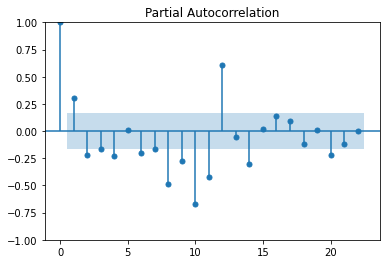

In [ ]:
# Plot PACF
plot_pacf(df['Passengers_Diff']);
